# Plot flow cytometry of delivery of Cre mRNA by Gag-MCP

# Introduction

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/flow_GagMCP_Cre"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

In [4]:
infile = "../preprocessed_data/flow_data/flow_GagMCP_Cre_summary.csv"

df_raw = pd.read_csv(infile, index_col=0)

print(df_raw.shape)
df_raw

(11, 17)


,Well Number,Condition Number,Condition x,Condition Name,Exporter?,Cargo?,Export Tag?,Fusogen?,Total Ungated Events (Depth: 0),Putative receiver Events (Depth: 1),% of Putative receiver Events in Total Events,Singlet Gated receiver Events (Depth: 2),% of Singlet Gated Events in Putative receiver Events,GFP-A Events in receiver Singlet (Depth: 3),% of GFP-A Events in receiver Singlet,mCherry-A Events in GFP-A POI (Depth: 4),% of mCherry-A Events in GFP-A POI
Plate Number,,,,,,,,,,,,,,,,,
1,B5,17,8.0,allDNA_Cre,-,+,-,-,40000,27363,68.4075,26930,98.417571,25747,95.607130,46,0.178662
1,B6,18,5.0,allDNA_CreMS2,-,+,+,-,40000,26732,66.8300,26290,98.346551,25167,95.728414,39,0.154965
1,B7,19,6.0,allDNA_Cre_VSVG,-,+,-,+,40000,26568,66.4200,26124,98.328817,25017,95.762517,58,0.231842
1,B8,20,2.0,allDNA_CreMS2_VSVG,-,+,+,+,40000,27030,67.5750,26580,98.335183,25411,95.601956,48,0.188895
1,B9,21,7.0,allDNA_GagMCP-dpol_Cre,+,+,-,-,40000,27716,69.2900,27276,98.412469,26077,95.604194,55,0.210914
1,B10,22,3.0,allDNA_GagMCP-dpol_CreMS2,+,+,+,-,40000,26884,67.2100,26482,98.504687,25356,95.748055,48,0.189304
1,B11,23,4.0,allDNA_GagMCP-dpol_Cre_VSVG,+,+,-,+,40000,26901,67.2525,26518,98.576261,25394,95.761370,42,0.165393
1,B12,24,1.0,allDNA_GagMCP-dpol_CreMS2_VSVG,+,+,+,+,40000,27657,69.1425,27241,98.495860,26124,95.899563,114,0.436380
1,C1,25,NaN,allDNA_Transfection_Reagents_Alone,-,-,-,-,40000,28832,72.0800,28390,98.466981,27021,95.177880,18,0.066615


# Plot delivery (% RFP+ cells)

In [5]:
conditions = ["allDNA_GagMCP-dpol_CreMS2_VSVG",
              "allDNA_CreMS2_VSVG",
              "allDNA_GagMCP-dpol_CreMS2",
              "allDNA_GagMCP-dpol_Cre_VSVG",
              "allDNA_CreMS2",
              "allDNA_Cre_VSVG",
              "allDNA_GagMCP-dpol_Cre",
              "allDNA_Cre",
              "allDNA_Transfection_Reagents_Alone",
              "allRNA_CreMS2_1000ng"]

selector = df_raw["Condition Name"].isin(conditions)
data = df_raw.loc[selector]

print(data.shape)
data.head()

(11, 17)


,Well Number,Condition Number,Condition x,Condition Name,Exporter?,Cargo?,Export Tag?,Fusogen?,Total Ungated Events (Depth: 0),Putative receiver Events (Depth: 1),% of Putative receiver Events in Total Events,Singlet Gated receiver Events (Depth: 2),% of Singlet Gated Events in Putative receiver Events,GFP-A Events in receiver Singlet (Depth: 3),% of GFP-A Events in receiver Singlet,mCherry-A Events in GFP-A POI (Depth: 4),% of mCherry-A Events in GFP-A POI
Plate Number,,,,,,,,,,,,,,,,,
1,B5,17,8.0,allDNA_Cre,-,+,-,-,40000,27363,68.4075,26930,98.417571,25747,95.607130,46,0.178662
1,B6,18,5.0,allDNA_CreMS2,-,+,+,-,40000,26732,66.8300,26290,98.346551,25167,95.728414,39,0.154965
1,B7,19,6.0,allDNA_Cre_VSVG,-,+,-,+,40000,26568,66.4200,26124,98.328817,25017,95.762517,58,0.231842
1,B8,20,2.0,allDNA_CreMS2_VSVG,-,+,+,+,40000,27030,67.5750,26580,98.335183,25411,95.601956,48,0.188895
1,B9,21,7.0,allDNA_GagMCP-dpol_Cre,+,+,-,-,40000,27716,69.2900,27276,98.412469,26077,95.604194,55,0.210914


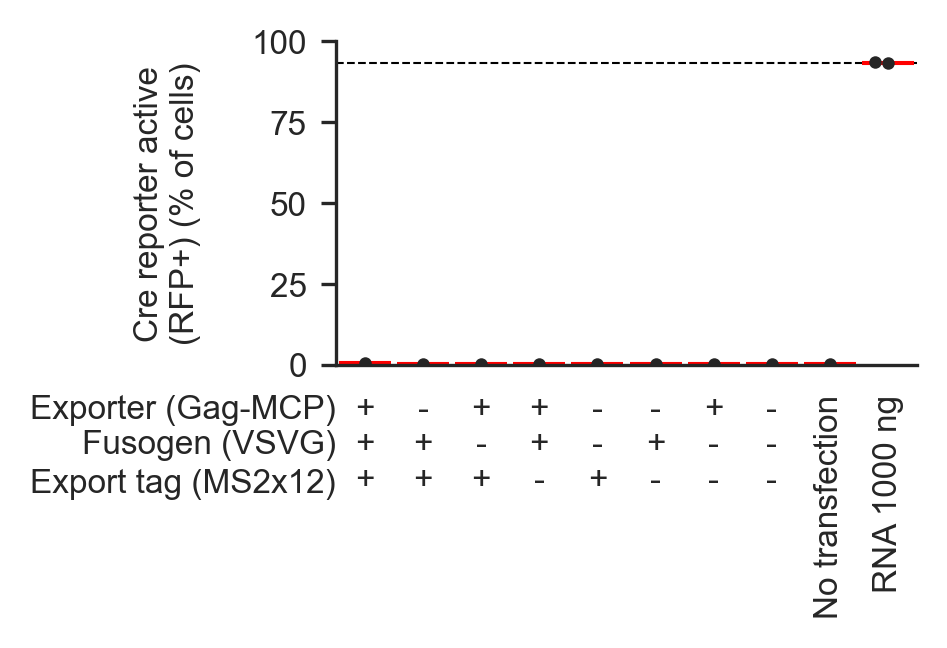

In [6]:
# Map conditions to x values
condition_to_x = dict(zip(conditions, range(len(conditions))))
data["x"] = data["Condition Name"].map(condition_to_x)

# Sort dataframe by x values
data = data.sort_values(by="x")

# Calculate summary statistic (mean)
summary = data.groupby("Condition Name").mean().reset_index()

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(2.5,1.4))

# Plot summary
x = summary["x"]
y = summary["% of mCherry-A Events in GFP-A POI"]
sns.scatterplot(ax=ax, x=x, y=y, marker="_", s=150, color="r")

# Plot replicates
x = data["x"]
y = data["% of mCherry-A Events in GFP-A POI"]

sns.swarmplot(ax=ax, x=x, y=y, marker="o", s=3, color="#252525", zorder=10)

offset = 0.22
x_offset = np.array([-offset, 0, offset])  # jitter offsets to avoid operlaps

# Set axis limits
ax.set_ylim(0, 100)

# Set labels
ax.set_xlabel("")
ax.set_ylabel("Cre reporter active\n(RFP+) (% of cells)", labelpad=12)

# Set tick labels

ax.set_xticks(range(max(x)+1))

xticklabels = ["+\n+\n+",
               "-\n+\n+",
               "+\n-\n+",
               "+\n+\n-",
               "-\n-\n+",
               "-\n+\n-",
               "+\n-\n-",
               "-\n-\n-",
               "No transfection",
               "RNA 1000 ng"]
ax.set_xticklabels(xticklabels)

ticks = ax.get_xticklabels()
ticks[-1].set_rotation(90)
ticks[-2].set_rotation(90)

# Make tick label annotations
ax.text(0, -0.09, "Exporter (Gag-MCP)", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.20, "Fusogen (VSVG)", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.32, "Export tag (MS2x12)", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)

# Make grey box
ymax_shade = summary.set_index("Condition Name").loc["allRNA_CreMS2_1000ng"]["% of mCherry-A Events in GFP-A POI"]
ax.axhline(ymax_shade, color="k", lw=0.5, ls="--", zorder=-1)

# Set style
ax.tick_params(axis='x', which='both', bottom=False)  # remove xticks
sns.despine()

save_figure(fig, "line_swarm_GagMCP_Cre_delivery")